# Toy gaussian example auto example

/Users/derek/Desktop/intro_to_gaussian_splatting/splat/test/auto_functions.py:105: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return final_color, torch.tensor(current_T)


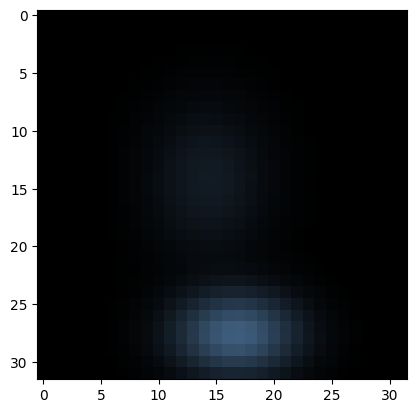

  0%|          | 0/3 [00:00<?, ?it/s]/Users/derek/Desktop/intro_to_gaussian_splatting/splat/test/auto_functions.py:105: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return final_color, torch.tensor(current_T)
 33%|███▎      | 1/3 [00:07<00:15,  7.52s/it, loss=0.0188]

loss tensor(0.0188, dtype=torch.float64, grad_fn=<MeanBackward0>)
point_3d grad1 tensor([[5.4784e+00, 4.7503e-01, 2.6245e-03]], dtype=torch.float64)
R grad1 tensor([[ 8.9092e-05, -1.0712e-03, -7.6801e-04, -8.1894e-05]],
       dtype=torch.float64)
S grad1 tensor([[0.0161, 0.0224, 0.0000]], dtype=torch.float64)
Color grad1 tensor([0.0022, 0.0036, 0.0051], dtype=torch.float64)
Opacity grad1 tensor([0.0027], dtype=torch.float64)
point_3d grad2 tensor([[-6.1485e-01, -1.0926e+00, -7.3328e-04]], dtype=torch.float64)
R grad2 tensor([[-0.0020,  0.0074,  0.0034,  0.0003]], dtype=torch.float64)
S grad2 tensor([[-0.0063, -0.0119,  0.0000]], dtype=torch.float64)
Color grad2 tensor([-0.0065, -0.0062, -0.0060], dtype=torch.float64)
Opacity grad2 tensor([-0.0008], dtype=torch.float64)





 67%|██████▋   | 2/3 [00:15<00:07,  7.62s/it, loss=0.0184]

loss tensor(0.0184, dtype=torch.float64, grad_fn=<MeanBackward0>)
point_3d grad1 tensor([[7.2015e+00, 2.8565e-01, 2.8494e-03]], dtype=torch.float64)
R grad1 tensor([[ 8.0155e-05, -1.0129e-03, -6.5503e-04, -7.7673e-05]],
       dtype=torch.float64)
S grad1 tensor([[0.0137, 0.0212, 0.0000]], dtype=torch.float64)
Color grad1 tensor([0.0020, 0.0035, 0.0049], dtype=torch.float64)
Opacity grad1 tensor([0.0026], dtype=torch.float64)
point_3d grad2 tensor([[ 0.0645, -0.5362, -0.0007]], dtype=torch.float64)
R grad2 tensor([[-0.0019,  0.0074,  0.0030,  0.0003]], dtype=torch.float64)
S grad2 tensor([[-0.0056, -0.0119,  0.0000]], dtype=torch.float64)
Color grad2 tensor([-0.0066, -0.0063, -0.0060], dtype=torch.float64)
Opacity grad2 tensor([-0.0008], dtype=torch.float64)





100%|██████████| 3/3 [00:22<00:00,  7.64s/it, loss=0.018] 

loss tensor(0.0180, dtype=torch.float64, grad_fn=<MeanBackward0>)
point_3d grad1 tensor([[8.6905e+00, 1.4952e-02, 2.9376e-03]], dtype=torch.float64)
R grad1 tensor([[ 6.6795e-05, -9.3522e-04, -4.8230e-04, -6.9028e-05]],
       dtype=torch.float64)
S grad1 tensor([[0.0101, 0.0195, 0.0000]], dtype=torch.float64)
Color grad1 tensor([0.0018, 0.0032, 0.0047], dtype=torch.float64)
Opacity grad1 tensor([0.0024], dtype=torch.float64)
point_3d grad2 tensor([[ 0.5654, -0.0389, -0.0007]], dtype=torch.float64)
R grad2 tensor([[-0.0018,  0.0073,  0.0026,  0.0002]], dtype=torch.float64)
S grad2 tensor([[-0.0049, -0.0118,  0.0000]], dtype=torch.float64)
Color grad2 tensor([-0.0066, -0.0062, -0.0059], dtype=torch.float64)
Opacity grad2 tensor([-0.0008], dtype=torch.float64)



GT image
GT image


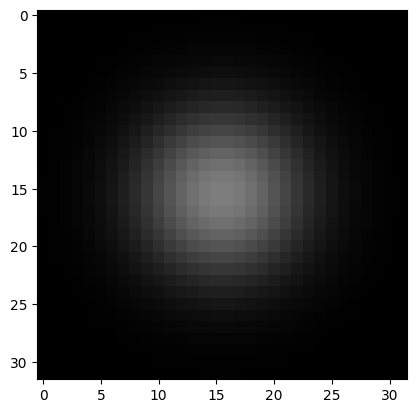

Final image


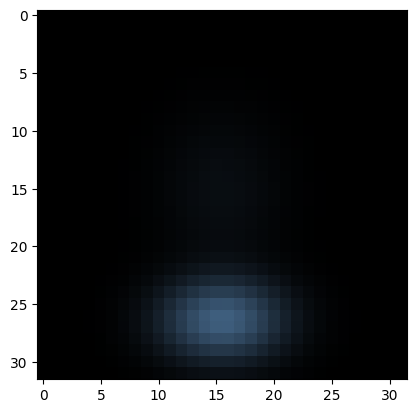

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import tqdm
from PIL import Image

from splat.test.create_image_auto import (
    Camera,
    Gaussian,
    create_image_covariance_test_auto,
    create_image_full_auto,
)

torch.autograd.set_detect_anomaly(True)

point_3d1 = torch.tensor([[0.101, 0.1001, -4]], dtype=torch.float64).requires_grad_(True)
r1 = torch.tensor([[0.5, 0.02, 0.03, 0.001]], dtype=torch.float64).requires_grad_(True)
s1 = torch.tensor([[.1, .15, .2]], dtype=torch.float64).requires_grad_(True)
color1 = torch.tensor([0.4, 0.6, 0.8], dtype=torch.float64).requires_grad_(True)
opacity1 = torch.tensor([0.5], dtype=torch.float64).requires_grad_(True)
gaussian1 = Gaussian(
    mean_3d=point_3d1, 
    r=r1, 
    s=s1, 
    color=color1, 
    opacity=opacity1
)

point_3d2 = torch.tensor([[0.0999, 0.0999, -4.1]], dtype=torch.float64).requires_grad_(True)
r2 = torch.tensor([[0.2, 0.04, 0.03, 0.001]], dtype=torch.float64).requires_grad_(True)
s2 = torch.tensor([[.2, .16, .1]], dtype=torch.float64).requires_grad_(True)
color2 = torch.tensor([0.1, 0.15, 0.2], dtype=torch.float64).requires_grad_(True)
opacity2 = torch.tensor([0.9], dtype=torch.float64).requires_grad_(True)
gaussian2 = Gaussian(
    mean_3d=point_3d2, 
    r=r2, 
    s=s2, 
    color=color2, 
    opacity=opacity2
)

focal_x = torch.tensor([100.0])
focal_y = torch.tensor([100.0])
width = 32
height = 32
camera_rotation = torch.tensor([1, 0, 0, 0]).unsqueeze(0)
camera_translation = torch.tensor([[-0.1, -0.1, 0.0]])

camera = Camera(
    focal_x=focal_x,
    focal_y=focal_y,
    c_x=0.0,
    c_y=0.0,
    width=width,
    height=height,
    camera_rotation=camera_rotation,
    camera_translation=camera_translation,
)
gt_image = Image.open("gt.png")
gt_image = np.array(gt_image) / 255.0
gt_image = torch.tensor(gt_image)

output_auto, output_ts1 = create_image_full_auto(camera, gaussian1, height, width)
current_Ts = torch.ones((height, width))
second_output, output_ts2 = create_image_full_auto(camera, gaussian2, height, width, current_Ts=output_ts1)
final_image = output_auto + second_output
plt.imshow(final_image.detach().numpy())
plt.show()

optimizer = torch.optim.Adam([r1, s1, point_3d1, color1, opacity1, r2, s2, point_3d2, color2, opacity2], lr=0.00005)

pbar = tqdm.tqdm(range(3))
for i in pbar:
    optimizer.zero_grad()

    current_Ts = torch.ones((height, width))
    output_auto, current_Ts = create_image_full_auto(camera, gaussian1, height, width, current_Ts=current_Ts)
    current_Ts = torch.ones((height, width))
    current_Ts = torch.ones((height, width)) * 0.5
    second_output, current_Ts = create_image_full_auto(camera, gaussian2, height, width, current_Ts=current_Ts)

    output_auto += second_output
    loss = (output_auto - gt_image).pow(2).mean()
    loss.backward()
    optimizer.step()
    pbar.set_postfix(loss=loss.item())
    print("loss", loss)
    print("point_3d grad1", point_3d1.grad)
    print("R grad1", r1.grad)
    print("S grad1", s1.grad)
    print("Color grad1", color1.grad)
    print("Opacity grad1", opacity1.grad)
    print("point_3d grad2", point_3d2.grad)
    print("R grad2", r2.grad)
    print("S grad2", s2.grad)
    print("Color grad2", color2.grad)
    print("Opacity grad2", opacity2.grad)
    print("\n\n")

    
print("GT image")
print("GT image")
plt.imshow(gt_image)
plt.show()
print("Final image")
plt.imshow(output_auto.detach().numpy())
plt.show()

# Toy Gaussian Custom Example

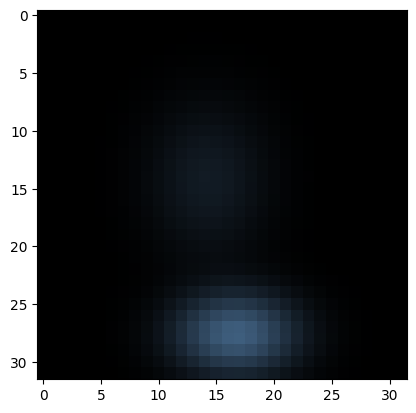

 33%|███▎      | 1/3 [00:02<00:04,  2.24s/it, loss=0.0188]

loss tensor(0.0188, dtype=torch.float64, grad_fn=<MeanBackward0>)
point_3d grad1 tensor([[5.4784e+00, 4.7503e-01, 2.6245e-03]], dtype=torch.float64)
R grad1 tensor([[ 8.9092e-05, -1.0712e-03, -7.6801e-04, -8.1894e-05]],
       dtype=torch.float64)
S grad1 tensor([[0.0161, 0.0224, 0.0000]], dtype=torch.float64)
Color grad1 tensor([0.0022, 0.0036, 0.0051], dtype=torch.float64)
Opacity grad1 tensor([0.0027], dtype=torch.float64)
point_3d grad2 tensor([[-6.1485e-01, -1.0926e+00, -7.3328e-04]], dtype=torch.float64)
R grad2 tensor([[-0.0020,  0.0074,  0.0034,  0.0003]], dtype=torch.float64)
S grad2 tensor([[-0.0063, -0.0119,  0.0000]], dtype=torch.float64)
Color grad2 tensor([-0.0065, -0.0062, -0.0060], dtype=torch.float64)
Opacity grad2 tensor([-0.0008], dtype=torch.float64)





 67%|██████▋   | 2/3 [00:04<00:02,  2.18s/it, loss=0.0184]

loss tensor(0.0184, dtype=torch.float64, grad_fn=<MeanBackward0>)
point_3d grad1 tensor([[7.2015e+00, 2.8565e-01, 2.8494e-03]], dtype=torch.float64)
R grad1 tensor([[ 8.0155e-05, -1.0129e-03, -6.5503e-04, -7.7673e-05]],
       dtype=torch.float64)
S grad1 tensor([[0.0137, 0.0212, 0.0000]], dtype=torch.float64)
Color grad1 tensor([0.0020, 0.0035, 0.0049], dtype=torch.float64)
Opacity grad1 tensor([0.0026], dtype=torch.float64)
point_3d grad2 tensor([[ 0.0645, -0.5362, -0.0007]], dtype=torch.float64)
R grad2 tensor([[-0.0019,  0.0074,  0.0030,  0.0003]], dtype=torch.float64)
S grad2 tensor([[-0.0056, -0.0119,  0.0000]], dtype=torch.float64)
Color grad2 tensor([-0.0066, -0.0063, -0.0060], dtype=torch.float64)
Opacity grad2 tensor([-0.0008], dtype=torch.float64)





100%|██████████| 3/3 [00:06<00:00,  2.22s/it, loss=0.018] 

loss tensor(0.0180, dtype=torch.float64, grad_fn=<MeanBackward0>)
point_3d grad1 tensor([[8.6905e+00, 1.4952e-02, 2.9376e-03]], dtype=torch.float64)
R grad1 tensor([[ 6.6795e-05, -9.3522e-04, -4.8230e-04, -6.9028e-05]],
       dtype=torch.float64)
S grad1 tensor([[0.0101, 0.0195, 0.0000]], dtype=torch.float64)
Color grad1 tensor([0.0018, 0.0032, 0.0047], dtype=torch.float64)
Opacity grad1 tensor([0.0024], dtype=torch.float64)
point_3d grad2 tensor([[ 0.5654, -0.0389, -0.0007]], dtype=torch.float64)
R grad2 tensor([[-0.0018,  0.0073,  0.0026,  0.0002]], dtype=torch.float64)
S grad2 tensor([[-0.0049, -0.0118,  0.0000]], dtype=torch.float64)
Color grad2 tensor([-0.0066, -0.0062, -0.0059], dtype=torch.float64)
Opacity grad2 tensor([-0.0008], dtype=torch.float64)



GT image
GT image


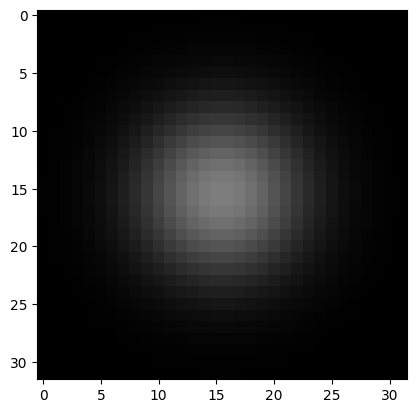

Final image


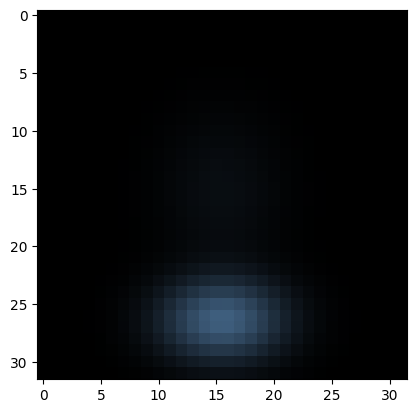

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import tqdm
from PIL import Image

from splat.test.create_image_custom import (
    Camera,
    Gaussian,
    create_image_covariance_test_custom,
    create_image_full_custom,
)

torch.autograd.set_detect_anomaly(True)

point_3d1 = torch.tensor([[0.101, 0.1001, -4]], dtype=torch.float64).requires_grad_(True)
r1 = torch.tensor([[0.5, 0.02, 0.03, 0.001]], dtype=torch.float64).requires_grad_(True)
s1 = torch.tensor([[.1, .15, .2]], dtype=torch.float64).requires_grad_(True)
color1 = torch.tensor([0.4, 0.6, 0.8], dtype=torch.float64).requires_grad_(True)
opacity1 = torch.tensor([0.5], dtype=torch.float64).requires_grad_(True)
gaussian1 = Gaussian(
    mean_3d=point_3d1, 
    r=r1, 
    s=s1, 
    color=color1, 
    opacity=opacity1
)

point_3d2 = torch.tensor([[0.0999, 0.0999, -4.1]], dtype=torch.float64).requires_grad_(True)
r2 = torch.tensor([[0.2, 0.04, 0.03, 0.001]], dtype=torch.float64).requires_grad_(True)
s2 = torch.tensor([[.2, .16, .1]], dtype=torch.float64).requires_grad_(True)
color2 = torch.tensor([0.1, 0.15, 0.2], dtype=torch.float64).requires_grad_(True)
opacity2 = torch.tensor([0.9], dtype=torch.float64).requires_grad_(True)
gaussian2 = Gaussian(
    mean_3d=point_3d2, 
    r=r2, 
    s=s2, 
    color=color2, 
    opacity=opacity2
)

focal_x = torch.tensor([100.0])
focal_y = torch.tensor([100.0])
width = 32
height = 32
camera_rotation = torch.tensor([1, 0, 0, 0]).unsqueeze(0)
camera_translation = torch.tensor([[-0.1, -0.1, 0.0]])

camera = Camera(
    focal_x=focal_x,
    focal_y=focal_y,
    c_x=0.0,
    c_y=0.0,
    width=width,
    height=height,
    camera_rotation=camera_rotation,
    camera_translation=camera_translation,
)
gt_image = Image.open("gt.png")
gt_image = np.array(gt_image) / 255.0
gt_image = torch.tensor(gt_image)

current_Ts = torch.ones((height, width))
output_auto = create_image_full_custom(camera, gaussian1, height, width, current_Ts=current_Ts)
current_Ts = torch.ones((height, width))
second_output = create_image_full_custom(camera, gaussian2, height, width, current_Ts=current_Ts)
final_image = output_auto + second_output
plt.imshow(final_image.detach().numpy())
plt.show()

optimizer = torch.optim.Adam([r1, s1, point_3d1, color1, opacity1, r2, s2, point_3d2, color2, opacity2], lr=0.00005)

pbar = tqdm.tqdm(range(3))
for i in pbar:
    optimizer.zero_grad()
    # we are sending gaussian1 through first since its z is closer to camera
    current_Ts = torch.ones((height, width))
    output_auto = create_image_full_custom(camera, gaussian1, height, width, current_Ts=current_Ts)
    current_Ts = torch.ones((height, width)) * 0.5
    second_output = create_image_full_custom(camera, gaussian2, height, width, current_Ts=current_Ts)
    # import pdb; pdb.set_trace()
    output_auto += second_output
    loss = (output_auto - gt_image).pow(2).mean()
    loss.backward()
    optimizer.step()
    pbar.set_postfix(loss=loss.item())
    print("loss", loss)
    print("point_3d grad1", point_3d1.grad)
    print("R grad1", r1.grad)
    print("S grad1", s1.grad)
    print("Color grad1", color1.grad)
    print("Opacity grad1", opacity1.grad)
    print("point_3d grad2", point_3d2.grad)
    print("R grad2", r2.grad)
    print("S grad2", s2.grad)
    print("Color grad2", color2.grad)
    print("Opacity grad2", opacity2.grad)
    print("\n\n")

    
print("GT image")
print("GT image")
plt.imshow(gt_image)
plt.show()
print("Final image")
plt.imshow(output_auto.detach().numpy())
plt.show()